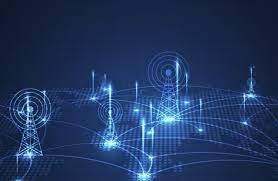

# <center><font color=darkblue>Predicting Churning Customers </font></center>
<center>by Cristel Irwin</center>

## <center><font color=blue>Business objective of this exercise :</font></center>
Analyze subscriber dataset to understand reasons for churn rate. Determine features of customers who could potentially leave the company.

What features contribute to the higher churn rate? Solutions?


This project is intended to identify the churn generation of customers in a telecommunications dataset. The telecommunication sector consists of companies that make communication accessible on a global scale, whether through the telephone or Internet connection, or via cable networks or wirelessly. This is a multi-billion dollar industry that is saturated with stiff competition. Churn is a measure of how many customers stop using a service or product, often evaluated for a specific period of time. This is one of the biggest difficulties any industry faces. Machine learning models will be used to analyze patterns, trends and predictions extracted from the data in order to identify significant decreases in the use of services and products by consumers. The goal is to precisely provide a company with methods that will help identify a decrease in consumption of their products in order to subsequently identify the problems that caused this decrease. This will in turn help the company’s marketing department explore new campaigns aimed at retaining and attracting new customers with differentiated services and new products.<br>

<br>
<center>CRISP-DM stands for Cross Industry Standard Process for Data Mining. It is commonly used by data experts to solve customer-related business problems. The project follows the 6 stages of the CRISP-DM methodology: <br>

Business understanding : in this step we try to really understand the motivation behind our analysis and ask questions

Data understanding : here we try to get insight from the data through EDA (exploratory data analysis)

Data Preparation : this is a very important stage where we make the necessary transformation on our data in order to fit to the requirement of a later ML model

Modeling : it is here where we start building our Machine learning model and try different algorithms.

Evaluation : we test our model with the right evaluation metrics

Deployment : after training the model and making sure the evaluation is correct and satisfactory, we pass the model to production</center>



## <center><font color=blue>CRISP-DM is the guideline to answer questions such as: </font></center> <br>

Are there correlations between churn and “Gender”, “Tenure”, “Partner”, “Dependents”, “Total Charges” and other combinations of attributes? <br>

Quantify the churn rate as a percentage or total number. <br>

The possibility of a hit rate above 80% in the customer’s churn forecast? <br>

What are the motivating factors to use the product or service? <br>

What is the percentage of customers who interacted with Tech Support churned? <br>

What is the percentage of customers in certain price bins churned? <br>

What percentage or total of contracted customers churned? <br>

What percentage or total of contracted customers are likely to upgrade to one-year or two-year contracts? (What do subscribers with one or two year contractshave in common?) <br>

What do the loyal customers have in common? And what do the churn customers have in common? <br>

More customer subscribe to online security than fiber optic internet service. What is the probability that the customers who subscribe to DSL and online security can be persuaded to upgrade to fiber optics? <br>



## <center><font color=blue>Data dictionary</font></center>

1) Customers who left within the last month:<br>

2) Churn: Yes = the customer left the company within the last month. No = the customer remained with the company.<br>
Customers' demographic info:<br>

3) gender: customer's gender: Male, Female<br>

4) SeniorCitizen: customer is 65 or older: 1, 0 (meaning Yes and No, respectively)<br>

5) Partner: customer is married: Yes, No<br>

6) Dependents: customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.<br>

7) Services that each customer has signed up for:<br>

8) PhoneService: customer subscribes to home phone service with the company: Yes, No<br>

9) MultipleLines: customer subscribes to multiple telephone lines with the company: Yes, No, No internet service<br>

10) InternetService: customer subscribes to Internet service with the company: No, DSL, Fiber Optic<br>

11) OnlineSecurity: customer subscribes to an additional online security service provided by the company: Yes, No, No internet service<br>

12) OnlineBackup: customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service<br>

13) DeviceProtection: customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service<br>

14) TechSupport: customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service<br>

15) StreamingTV: customer uses their Internet service to stream television programming from a third-party provider: Yes, No, No internet service<br>

16) StreamingMovies: customer uses their Internet service to stream movies from a third-party provider: Yes, No, No internet service<br>

17) Customer account information:<br>

18) tenure: total number of months that the customer has been with the company.<br>

19) Contract: customer's current contract type: Month-to-Month, One Year, Two Year.<br>

20) PaperlessBilling: customer has chosen paperless billing: Yes, No<br>

21) PaymentMethod: how the customer pays their bill: Electronic check, Credit Card, Mailed Check, Bank transfer<br>

22) MonthlyCharge: customer's current total monthly charge for all their services from the company<br>

23) TotalCharges: customer's total charges, calculated to the end of the quarter<br>

24) Finally, each customer has a CustomerID, a unique ID that identifies the customer. (flsbustamante, n.d.)

In [1]:
## Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, PercentFormatter, MultipleLocator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import scipy.stats as scs
import prince
import pickle
from sklearn import preprocessing
from IPython.display import HTML
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from ipywidgets import interact
from ipywidgets import widgets 

In [2]:
churn_df = pd.read_csv("Customer_Churn_Dataset.csv")

In [3]:
## HTML Code for Toggle
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="CLICK THE TOGGLE BUTTON TO VIEW CODE"></form>''')

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <center><font color=blue>Preliminary Discoveries:</font></center>

Through data cleaning and initial exploration, the data reveals: <br>

There are 21 columns and 7043 rows in the data set. <br>

Gender is almost equally distributed in this dataset. However, there are less female customers than male customers.<br>
Male      3555 <br>
Female    3488

The majority of customers are under the age of 65.   <br>
Younger= 5901<br>
Older= 1142

The majority of customers have NO partners.<br>
No     3641<br>
Yes    3402

The majority of customers have NO dependents.<br>
No     4933<br>
Yes    2110

The majority of customers have phone service.<br>
Yes    6361<br>
No      682

The majority of customers have single lines vs. multiple.<br>
No                  3390<br>
Yes                 2971

The majority of customers have fiber optic internet service vs. DSL, whereas 1,526 customers have no internet service at all.<br>
Fiber optic    3096<br>
DSL            2421<br>
No             1526

A Majority of customers with internet do NOT utilize the online services service.<br>
No                     3498 <br> 
Yes                    2019<br><br>
No internet service    1526

A majority of customers do not subsrcibe to online backup services. <br>
No                     3088<br>
Yes                    2429<br>
No internet service    1526

A majority of customers do not subsrcibe to Device Protection. <br>
No                     3095<br>
Yes                    2422<br>
No internet service    1526

A majority of customers do not utilize the tech support option. <br>
No                     3473 <br>
Yes                    2044<br>
No internet service    1526

A majority of customers do not use the streaming TV service. <br>
No                     2810<br>
Yes                    2707<br>
No internet service    1526

A majority of customers do not use the streaming MOVIES service. <br>
No                     2785<br>
Yes                    2732<br>
No internet service    1526

A majority of subscribers have Month-to-Month contracts vs. one or two year contracts: <br>
Month-to-month    3875<br>
Two year          1695<br>
One year          1473

A majority of customers prefer paperless billing. <br>
Yes    4171<br>
No     2872<br>

A majority of customers pay with Electronic check: <br>
Electronic check             2365<br>
Mailed check                 1612<br>
Bank transfer (automatic)    1544<br>
Credit card (automatic)      1522

The number of people who have churned away from this company is signified by "Yes". <br>
No     5174<br>
Yes    1869

In [5]:
# The info() method reveal that there are 21 columns and 7043 rows in the data set. 
#There are no null or missing values, so there is no need to impute the data to fill NAN values

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn_df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [7]:
## Re-check this
#From the distribution shown below,it seems that the outlier is Senior Citizen. The numbers are gradually increasing in each column, but this particular column .

churn_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
90%,1.000000,69.000000,102.600000
95%,1.000000,72.000000,107.400000
99%,1.000000,72.000000,114.729000


In [8]:
churn_df.describe(exclude=[np.number])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
churn_rate1 = churn_df["gender"].value_counts()
print("Gender", churn_rate1)

churn_rate2 = churn_df["SeniorCitizen"].value_counts()
print("SeniorCitizen", churn_rate2)

churn_rate3 = churn_df["Partner"].value_counts()
print("Partner", churn_rate3)

churn_rate4 = churn_df["Dependents"].value_counts()
print("Dependents", churn_rate4)

churn_rate5 = churn_df["PhoneService"].value_counts()
print("PhoneService", churn_rate5)

churn_rate6 = churn_df["MultipleLines"].value_counts()
print("MultipleLines", churn_rate6)

churn_rate7 = churn_df["InternetService"].value_counts()
print("InternetService", churn_rate7)

churn_rate8 = churn_df["OnlineSecurity"].value_counts()
print("OnlineSecurity", churn_rate8)

churn_rate9 = churn_df["OnlineBackup"].value_counts()
print(churn_rate9)

churn_rate10 = churn_df["DeviceProtection"].value_counts()
print("DeviceProtection", churn_rate10)

churn_rate11 = churn_df["TechSupport"].value_counts()
print("TechSupport", churn_rate11)

churn_rate12 = churn_df["StreamingTV"].value_counts()
print("StreamingTV", churn_rate12)

churn_rate13 = churn_df["StreamingMovies"].value_counts()
print("StreamingMovies", churn_rate13)

churn_rate14 = churn_df["Contract"].value_counts()
print("Contract", churn_rate14)

churn_rate15 = churn_df["PaperlessBilling"].value_counts()
print("PaperlessBilling", churn_rate15)

churn_rate16 = churn_df["PaymentMethod"].value_counts()
print("PaymentMethod", churn_rate16)

Gender Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport No                     3473
Yes     

## <center><font color=blue>Encoding the Data</font></center>

In [10]:
churn_df1 = churn_df

encoded_df = churn_df1
encoded_df["gender"] = encoded_df["gender"].astype('category')
encoded_df["gender"] = encoded_df["gender"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["SeniorCitizen"] = encoded_df["SeniorCitizen"].astype('category')
encoded_df["SeniorCitizen"] = encoded_df["SeniorCitizen"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["Partner"] = encoded_df["Partner"].astype('category')
encoded_df["Partner"] = encoded_df["Partner"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["Dependents"] = encoded_df["Dependents"].astype('category')
encoded_df["Dependents"] = encoded_df["Dependents"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["PhoneService"] = encoded_df["PhoneService"].astype('category')
encoded_df["PhoneService"] = encoded_df["PhoneService"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["MultipleLines"] = encoded_df["MultipleLines"].astype('category')
encoded_df["MultipleLines"] = encoded_df["MultipleLines"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["InternetService"] = encoded_df["InternetService"].astype('category')
encoded_df["InternetService"] = encoded_df["InternetService"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["OnlineSecurity"] = encoded_df["OnlineSecurity"].astype('category')
encoded_df["OnlineSecurity"] = encoded_df["OnlineSecurity"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["OnlineBackup"] = encoded_df["OnlineBackup"].astype('category')
encoded_df["OnlineBackup"] = encoded_df["OnlineBackup"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["DeviceProtection"] = encoded_df["DeviceProtection"].astype('category')
encoded_df["DeviceProtection"] = encoded_df["DeviceProtection"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["TechSupport"] = encoded_df["TechSupport"].astype('category')
encoded_df["TechSupport"] = encoded_df["TechSupport"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["StreamingTV"] = encoded_df["StreamingTV"].astype('category')
encoded_df["StreamingTV"] = encoded_df["StreamingTV"].cat.codes
encoded_df.head()

encoded_df = churn_df
encoded_df["StreamingMovies"] = encoded_df["StreamingMovies"].astype('category')
encoded_df["StreamingMovies"] = encoded_df["StreamingMovies"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["Contract"] = encoded_df["Contract"].astype('category')
encoded_df["Contract"] = encoded_df["Contract"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["PaperlessBilling"] = encoded_df["PaperlessBilling"].astype('category')
encoded_df["PaperlessBilling"] = encoded_df["PaperlessBilling"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["PaymentMethod"] = encoded_df["PaymentMethod"].astype('category')
encoded_df["PaymentMethod"] = encoded_df["PaymentMethod"].cat.codes
encoded_df.head()

# encoded_df = churn_df
# encoded_df["MonthlyCharges"] = encoded_df["MonthlyCharges"].astype('category')
# encoded_df["MonthlyCharges"] = encoded_df["MonthlyCharges"].cat.codes
# encoded_df.head()

encoded_df = churn_df1
encoded_df["TotalCharges"] = encoded_df["TotalCharges"].astype('category')
encoded_df["TotalCharges"] = encoded_df["TotalCharges"].cat.codes
encoded_df.head()

encoded_df = churn_df1
encoded_df["Churn"] = encoded_df["Churn"].astype('category')
encoded_df["Churn"] = encoded_df["Churn"].cat.codes
encoded_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


## <center><font color=blue>Visualizing the Churn Rate </font></center>

The data reveals that from 7043 entries, 1869 unsubscribed or stop using the products. This means that the company has a 26.5% churn rate and a 73.5% loyalty rate.  According to Investopedia.com, a good churn rate is between 3%-5%. (https://www.investopedia.com/terms/c/churnrate.asp)

In [11]:
# Churn rate Yes vs. No value counts

churn_rate17 = churn_df["Churn"].value_counts()
churn_rate17

0    5174
1    1869
Name: Churn, dtype: int64

In [12]:
# Churn rate Yes vs. No value counts as percentages

churn_rate18 = churn_df["Churn"].value_counts(normalize=True) * 100
churn_rate18

0    73.463013
1    26.536987
Name: Churn, dtype: float64

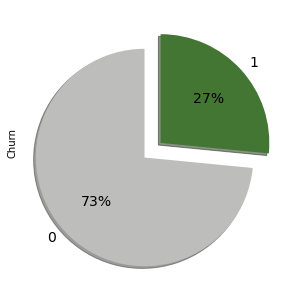

In [13]:
#Churn rate visualization

explode = [0.2, 0]
churn_df.Churn.value_counts().plot.pie(y='Churn', figsize=(5, 5), autopct='%1.0f%%', colors = ['#BDBDBC', '#437633'], explode= explode, startangle= 90, shadow=True, textprops={'fontsize': 14})
plt.show()

## <center><font color=blue>Investigating the churn rate for customers in relation to tech support: </font></center>

The data reveals that out of 1,869 who churned, <br> 
1,446 (or 77.37%) did NOT utilize tech support <br> 
310 ( or 16.59%) of them utilized tech support <br> 
113 (or 6.05%) did not have internet service <br> 
 

In [14]:
churn_df["TechSupport"].unique()

array([0, 2, 1], dtype=int8)

In [15]:
churn_df["TechSupport"].head()

0    0
1    0
2    0
3    2
4    0
Name: TechSupport, dtype: int8

In [16]:
encoded_df["Churn"].unique()

array([0, 1], dtype=int8)

In [17]:
# Yes churn = 1
# No churn = 0

churned_Yes = encoded_df[encoded_df['Churn']== 1]

count_Yes = churned_Yes[churned_Yes['TechSupport']== 2]
count_No_0 = churned_Yes[churned_Yes['TechSupport']== 0]
count_Not_Applicable = churned_Yes[churned_Yes['TechSupport']== 1]


print("Total number of churned customers\n", churned_Yes['Churn'].value_counts())

print("\nValue counts for churned customers who used tech support\n",count_Yes['TechSupport'].value_counts())

print("\nValue counts for churned customers who did NOT used tech support\n", count_No_0['TechSupport'].value_counts())

print("\nValue counts for churned customers who did not have internet service\n", count_Not_Applicable['TechSupport'].value_counts())

Total number of churned customers
 1    1869
Name: Churn, dtype: int64

Value counts for churned customers who used tech support
 2    310
Name: TechSupport, dtype: int64

Value counts for churned customers who did NOT used tech support
 0    1446
Name: TechSupport, dtype: int64

Value counts for churned customers who did not have internet service
 1    113
Name: TechSupport, dtype: int64


## <center><font color=blue>Divide customers into bins for the number of months they have been customers.</font></center> 

The data revealed that: <br>
<br>
2175 customers were tenured at 1-12 months. <br>  
1407 customers were tenured at  61 - 72 months. <br><br>
1024 customers were tenured at 13 - 24 months.  <br>      
832 customers were tenured at 25 - 36 months.   <br>    
832 customers were tenured at 49 - 60 months.  <br>       
762 customers were tenured at 37 - 48 months.  <br>       

In [18]:
print(churn_df['tenure'].max())

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

churn_df['tenure_group'] = pd.cut(churn_df.tenure, range(1, 80, 12), right=False, labels=labels)

churn_df['tenure_group'].value_counts()

72


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

## <center><font color=blue>Visualizing the Concentration of Values with SNS Heatsaps</font></center>

The heatmap were used to visualize "hot" and "cold" patterns in the data, or helps us to discover the bivariate relationship between independent variables in a dataset.. Three different graphs were used to give readers various perspectives and to compare the information. In "Chrun Heatmap 1", there seems to be no real strong correlations between the features in relation to "Churn". "MonthlyCharges", "PaymentMethod", and "SeniorCitizens" seem to be highest contributing factors to the churn rate. "Churn Heatmap 2" gives better insight. The strongly correlated features are marked by warmer colors whereas the ones with negative correlations are marked by blue and cooler colors. The map indicated that the churn rate is influence by a number of factors including but not limited to: "MultipleLines", "InternetService", streaming movies and television shows, "TechSupport", etc.

<AxesSubplot: title={'center': 'Churn Heatmap 1'}>

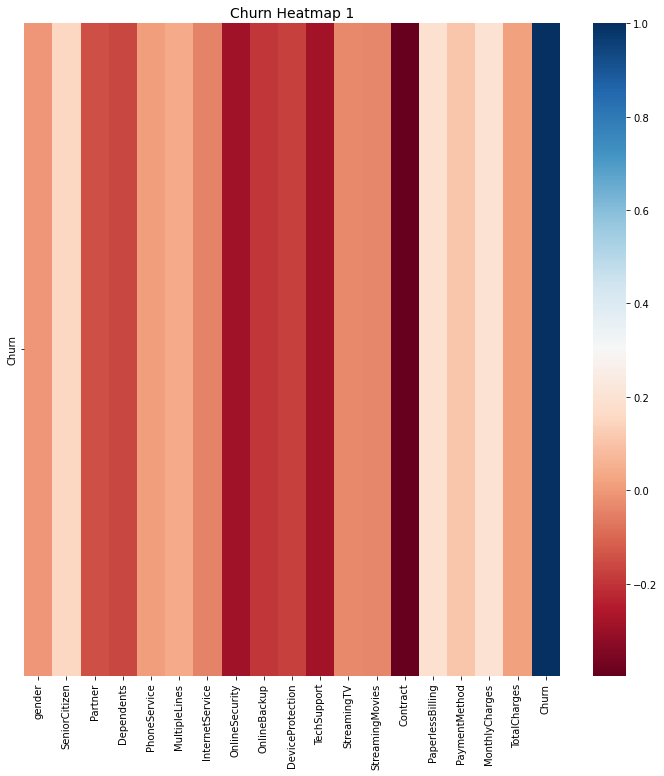

In [19]:
heatmap_df= encoded_df.drop(columns=['tenure'])

plt.figure(figsize=(12,12))
plt.title("Churn Heatmap 1", fontsize="14")
sns.heatmap(heatmap_df.corr().loc[['Churn'],:], cmap="RdBu")

Text(0.5, 1.0, 'Churn Heatmap 2')

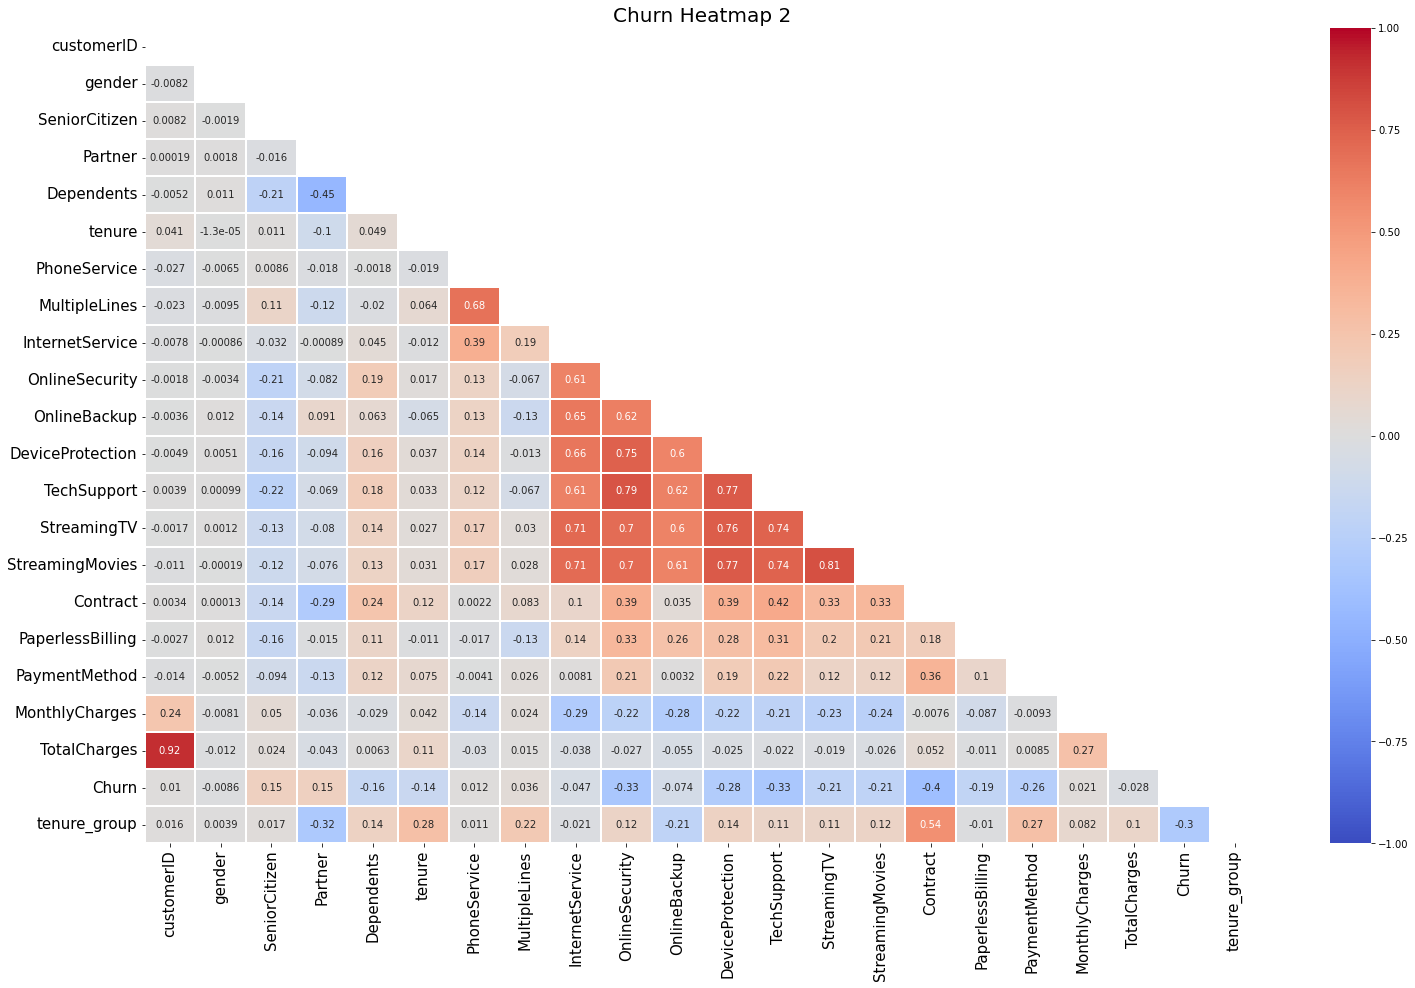

In [20]:
plt.figure(5, figsize=(25, 15))
corr = churn_df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Churn Heatmap 2", fontsize="20")

## <center><font color=blue>Investigating Categorical variables and Their Relationships with Churn</font></center>

The following plots reveal the distibution of individual predictors by churn. The variables were broken down into four groups to make the analysis easier to read. Observations were briefly described in the markdown but go more in-depth in the final recommendations. 
<br>

## <font color=gray>*Observations: Group 1*</font>

Gender: Gender is difficult to determine since the churn counts are almost equal.

Senior Citizen: The churn rate for customers over the age of 65 is lower than the loyalty rate. It appears to be around or less than 500. 

Partner: Customers who have partners have a lower chance of churning.

Dependents: Customers with dependants (dependents could mean children, elderly, disabled people, partners) have lower chances of churning.


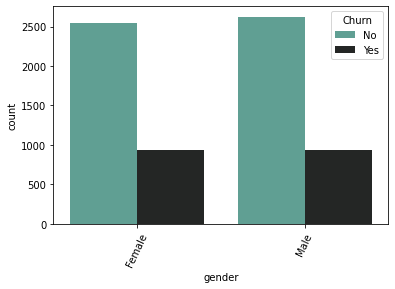

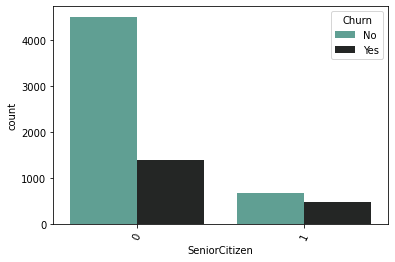

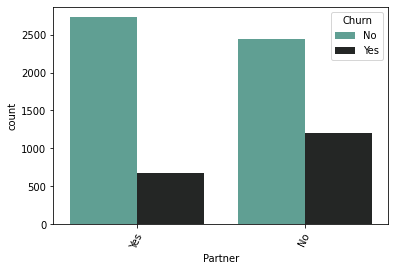

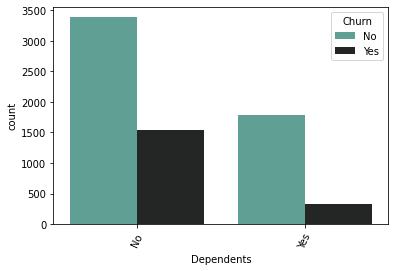

In [21]:
# Group 1
churn_BarCharts = pd.read_csv("Customer_Churn_Dataset.csv") 
churn_BarCharts['tenure_group']= churn_df['tenure_group']

dropped_df = churn_BarCharts.drop(columns= ['customerID','tenure', 'MonthlyCharges'])

dropped_df1 = dropped_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']] 

for i, predictor in enumerate(dropped_df1.drop(columns=['Churn'])):
    plt.figure(i)
    plt.xticks(rotation=65)
    #plt.subplots_adjust(hspace = 2.0)
    sns.countplot(data=dropped_df1, x=predictor, hue="Churn", palette="dark:#5A9_r")

## <font color=gray>*Observations: Group 2*</font>

PhoneService: Customers with Phone Service are less likely to churn.

MultipleLines: Customers with Multiple Lines are less likely to churn.

InternetService: An interesting observation about customers with Fiber Optic Interner Service is that they have higher chances of churning.


OnlineSecurity: Customers with no Online Security service have a higher churn rate as well. 
    

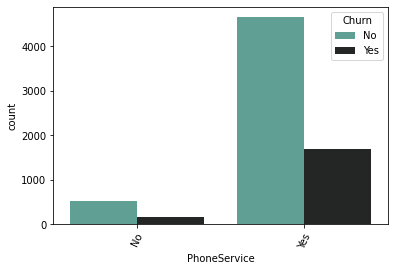

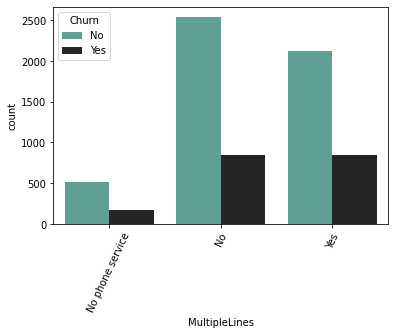

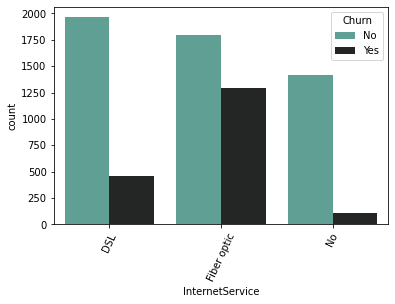

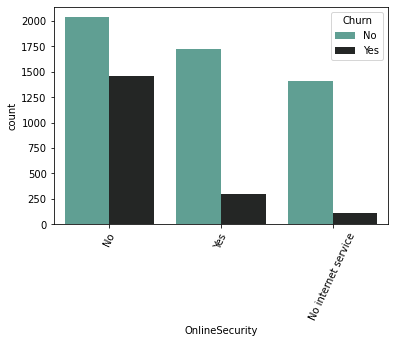

In [22]:
# Group 2

dropped_df2 = dropped_df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'Churn']] 

for i, predictor in enumerate(dropped_df2.drop(columns=['Churn'])):
    plt.figure(i)
    plt.xticks(rotation=65)
    sns.countplot(data=dropped_df2, x=predictor, hue="Churn", palette="dark:#5A9_r")

## <center><font color=blue>Digging Deeper into Group 2 Findings: How many churned customers who subscribed to Fiber Optics utilized Tech Support?</font> <br></center>


The data shows that out of the 1,446 (or 77.37%) customers did NOT utilize tech support, 1,101 suscribed to fiber optic service. That is a whopping 76.14% in the category of just TechSupport, and 58.90% of the overall churn total of 1,869 ex-customers.

In [23]:
churn_df3 = pd.read_csv("Customer_Churn_Dataset.csv")

churn_df3["InternetServiceSTRING"]= churn_df3["InternetService"].astype(str)

Churn_Yes = churn_df3[churn_df3["Churn"].str.contains("Yes")==True]
Churn_TS_no = Churn_Yes[Churn_Yes["TechSupport"].str.contains("No")==True]

Churn_FO_Yes = Churn_TS_no[Churn_TS_no["InternetServiceSTRING"].str.contains("Fiber optic")==True]

print("Number of churned customers who did not utilize tech support\n", Churn_TS_no["TechSupport"].value_counts())
print("\n\nNumber of churned customers who subscribed to fiber optic service but did not utilize tech support\n", Churn_FO_Yes["InternetService"].value_counts())

Number of churned customers who did not utilize tech support
 No                     1446
No internet service     113
Name: TechSupport, dtype: int64


Number of churned customers who subscribed to fiber optic service but did not utilize tech support
 Fiber optic    1101
Name: InternetService, dtype: int64



## <center><font color=blue>Digging Deeper into Group 2 Findings:: How many customers who had NO Online Security Contacted Tech Support?</font></center> 

The data reveals that out of that out of the 1,446 (or 77.37%) customers did NOT utilize tech support, 1,250 also did NOT subscribe to Online Security. This accounts for 66.88% of the overall churn total of 1,869 ex-customers.

In [24]:
Churn_Yes = churn_df3[churn_df3["Churn"].str.contains("Yes")==True]
Churn_TS_no = Churn_Yes[Churn_Yes["TechSupport"].str.contains("No")==True]

Churn_OS_No = Churn_TS_no[Churn_TS_no["OnlineSecurity"].str.contains("No")==True]

print("Number of churned customers who did not utilize tech support\n", Churn_TS_no["TechSupport"].value_counts())
print("\n\nNumber of churned customers who did NOT subscribe to Online Security service and did not utilize tech support\n", Churn_OS_No["OnlineSecurity"].value_counts())

Number of churned customers who did not utilize tech support
 No                     1446
No internet service     113
Name: TechSupport, dtype: int64


Number of churned customers who did NOT subscribe to Online Security service and did not utilize tech support
 No                     1250
No internet service     113
Name: OnlineSecurity, dtype: int64


## <font color=gray>*Observations: Group 3*</font>

Online Backup: Customers with No online backup have a higher chance of churning

DeviceProtection: Customers without device protection have likely higher chances of leaving

TechSupport: Customer who opted out of utilizing Tech Support have higher churn rates

StreamingTV & StreamingMovies: Both categories had almost equal churn rates for customers who did and did not utilize these services.



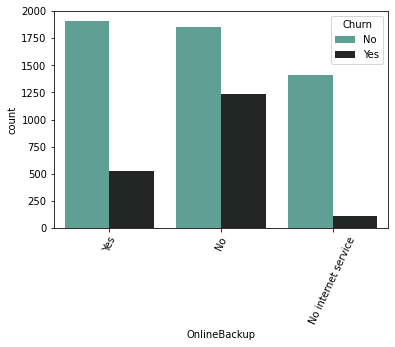

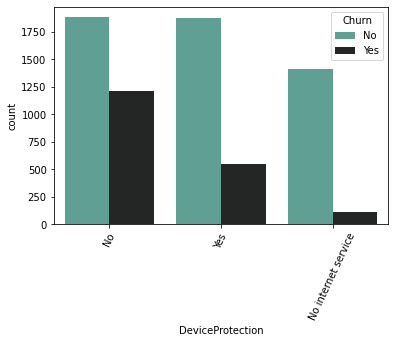

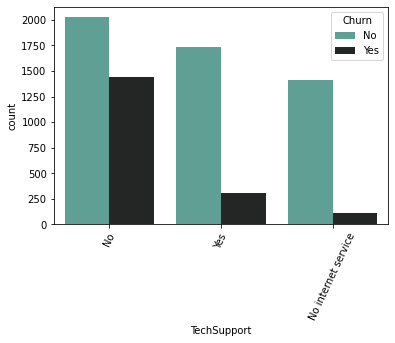

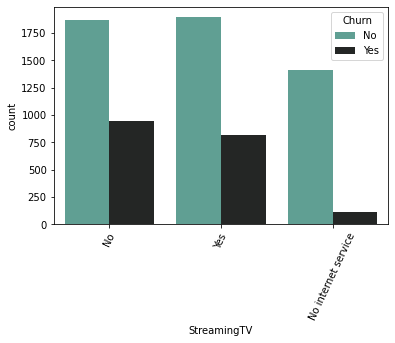

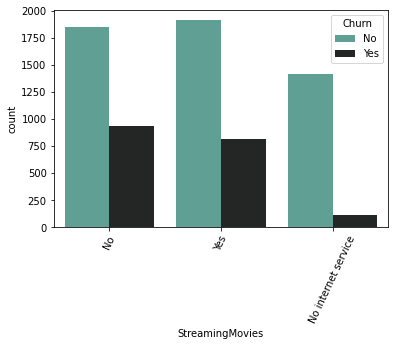

In [25]:
# Group 3

dropped_df3 = dropped_df[['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']] 

for i, predictor in enumerate(dropped_df3.drop(columns=['Churn'])):
    plt.figure(i)
    plt.xticks(rotation=65)
    sns.countplot(data=dropped_df3, x=predictor, hue="Churn", palette="dark:#5A9_r")

## <font color=gray>*Observations: Group 4*</font>

PaperlessBilling: Customers with paperless billing have higher chances of churning

PaymentMethod: Surprisingly, Customers who paid with Electronic Check had approximately 3 times more churn rate than customers who paid using paper check (mail), bank transfer, or credit card.

Tenure_Groups & Contract:  The bar chart for tenure groups revealed that customers were more likely to churn within one to 12 months of using the company's services. This corresponds to the bar chart for Contracts that reveal customers on a month-to-month subscription churned at hire rates than customers who were locked into a one or two year contract.

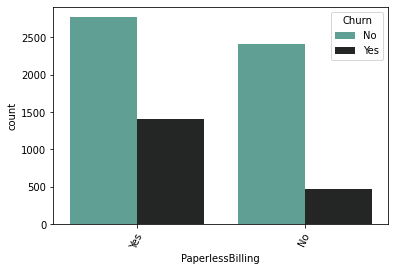

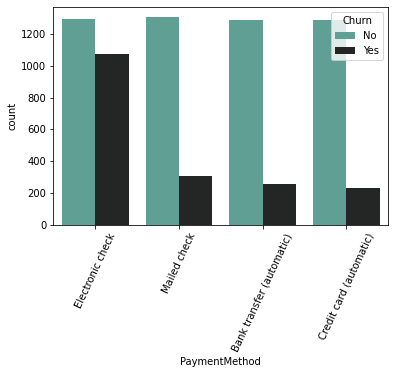

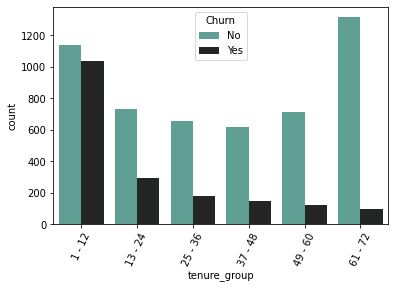

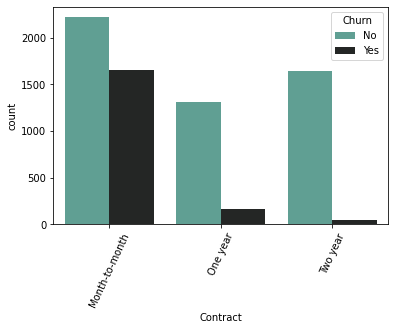

In [26]:
# Group 4

dropped_df4 = dropped_df[['PaperlessBilling', 'PaymentMethod', 'tenure_group', 'Contract', 'Churn']] 

for i, predictor in enumerate(dropped_df4.drop(columns=['Churn'])):
    plt.figure(i)
    plt.xticks(rotation=65)
    sns.countplot(data=dropped_df4, x=predictor, hue="Churn", palette="dark:#5A9_r")

## <center><font color=blue>Investigating Tenure Distribution and Tenure Groups</font></center>

The distribution plot is showing us the frequency of churn as related to tenure. Tenure is displayed in months in the x-axis. Just as the bar charts above showed, the data here also reveals that customers leave the company within the first four months. Customers who were month-to-month stayed to around 20 months had higher loyalty rates. This is signified by the decrease in bar heights around the middle of the chart. Customers with two year contracts had higher churns rates at around 70 months.

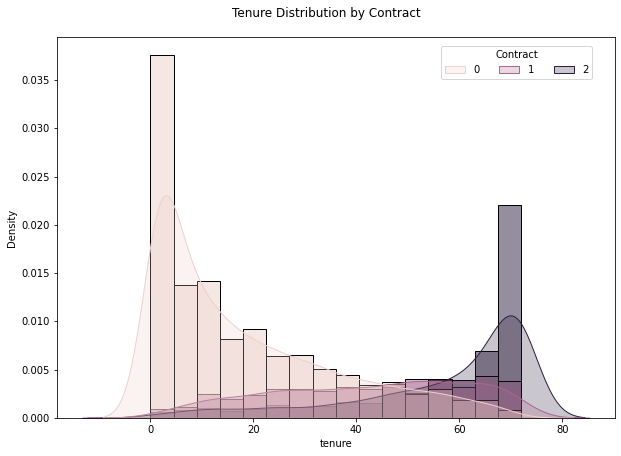

(None,)

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.histplot(x='tenure', hue='Contract', data=churn_df, ax=ax, kde=False, fill=True, stat='density', common_norm=True, multiple='layer')
sns.kdeplot(x='tenure', hue='Contract', data=churn_df, ax=ax, fill=True, multiple='layer')

fig.suptitle('Tenure Distribution by Contract', y= 0.94)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(0.68, 0.99), ncol=3)

plt.show(), 

## <center><font color=blue>Churn Rate by Payment Method Type</font></center>

Below is a clearer visualization of the relationship between payment methods and customer churn. Customers who pay using  electronic checks have a higher churn rate where as people who pay using bank transfers have the lowest churn rates. I

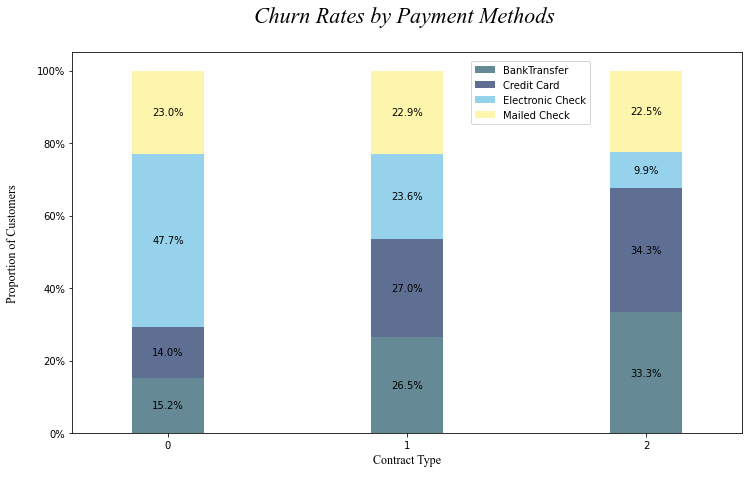

In [28]:
contract_churn = encoded_df.groupby(['Contract','PaymentMethod']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#658A96','#5F6F94', '#97D2EC' , '#FEF5AC']

labels = (['BankTransfer', 'Credit Card', 'Electronic Check', 'Mailed Check'])

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(

kind='bar', width = 0.3,stacked = True,rot = 0,figsize = (12,7), color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "Times New Roman")
plt.xlabel('Contract Type\n', horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "Times New Roman")
plt.title('Churn Rates by Payment Methods \n', horizontalalignment="center", fontstyle = "italic",  fontsize = "22", fontfamily = "Times New Roman")

plt.legend('top right', bbox_to_anchor=(0.78, 0.99), fontsize = "medium", labels = labels)

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

## <center><font color=blue>Churn Rates Compared to Monthly Charges</font></center>

The data reveals that customers begin to churn when the monthly costs grow higher, which isn't surprising. The most useful information is that the churn starts to grows exponentially from `$`60 to `$`80 but decreases at `$`120.

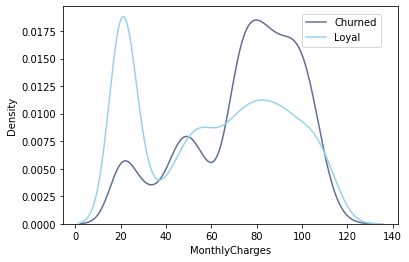

In [29]:
Churn_yes = encoded_df[encoded_df['Churn']== 1] 
Churn_no = encoded_df[encoded_df['Churn']== 0]

sns.distplot(Churn_yes['MonthlyCharges'],label='Churned',hist=False, color='#5F6F94')
sns.distplot(Churn_no['MonthlyCharges'],label='Loyal',hist=False, color='#97D2EC')
plt.legend(bbox_to_anchor=(0.70, 0.99))
plt.show()

## <center><font color=blue>Digging Deeper into Tenure:</font></center>

Code did not uncover additonal or new information.

In [30]:
# # Deep dive into monthly charges
# # A subset was created that only contains the customer data of those 
# # who spend 75.00 & 110.00

# monthly_75 = Churn_yes[Churn_yes['MonthlyCharges'] >=75.00]
# monthly_75 = monthly_75[monthly_75['MonthlyCharges'] <=100.00]

In [31]:
# tenure_1 = encoded_df[encoded_df['tenure_group'] =='1 - 12']
# tenure_2 = encoded_df[encoded_df['tenure_group'] =='61 - 72']
# tenure_3 = encoded_df[encoded_df['tenure_group'] =='13 - 24']
# tenure_4 = encoded_df[encoded_df['tenure_group'] =='25 - 36']
# tenure_5 = encoded_df[encoded_df['tenure_group'] =='49 - 60']
# tenure_6 = encoded_df[encoded_df['tenure_group'] =='37 - 48']

In [32]:
# print(tenure_1['gender'].value_counts())
# print(tenure_1['SeniorCitizen'].value_counts())
# print(tenure_1['Dependents'].value_counts())
# print(tenure_1['PhoneService'].value_counts())
# print(tenure_1['MultipleLines'].value_counts())
# print(tenure_1['InternetService'].value_counts())
# print(tenure_1['OnlineSecurity'].value_counts())
# print(tenure_1['OnlineBackup'].value_counts())
# print(tenure_1['DeviceProtection'].value_counts())
# print(tenure_1['TechSupport'].value_counts())
# print(tenure_1['StreamingTV'].value_counts())
# print(tenure_1['StreamingMovies'].value_counts())
# print(tenure_1['PaperlessBilling'].value_counts())
# print(tenure_1['PaymentMethod'].value_counts())


## <center><font color=blue>SKLearn train_test_split</font></center>

In [33]:
x = encoded_df.drop(['Churn', 'tenure_group', 'customerID'], axis = 1) 
y = encoded_df['Churn']

x = StandardScaler().fit_transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

SKLearn train, test, split was used to rate the accuracy of the findings. 

In [35]:
model_lg = LogisticRegression()

model_lg.fit(x_train, y_train)

predictions_lr = model_lg.predict(x_test)

lg = accuracy_score(y_test, predictions_lr)
print(lg)

0.8078561287269286


Confusion Matrix

<AxesSubplot: >

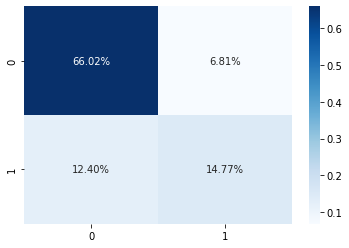

In [36]:
cm1 = confusion_matrix(y_test, predictions_lr)

sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')

## <center><font color=blue>Random Forrest</font></center>

Not mentioned in report due to slighly lower accuracy score than SKLearn (80% vs. 81%)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)


prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7970191625266146


## <center><font color=blue>Testing Predictions</font></center>

The below code uses the train, test, split data to check whether the important categories predicted above were correct, and the answer is "Yes!". The final report below will explain more how "MonthlyCharges", "PaperlessBilling", "InternetService" (or Fiber Optic), and "TotalCharges" play a factor in the overall churn rate.

In [38]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

feature_importances = pd.concat([pd.DataFrame(churn_df.drop(columns = 'customerID').
columns, columns = ["features"]),pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],axis = 1)

feature_importances.sort_values("coef", ascending = False)

#print(Important_features_test)

,features,coef
17,MonthlyCharges,0.828795
15,PaperlessBilling,0.210310
7,InternetService,0.197469
18,TotalCharges,0.137572
1,SeniorCitizen,0.099532
6,MultipleLines,0.074671
16,PaymentMethod,0.071168
12,StreamingTV,0.029748
2,Partner,0.006782
0,gender,0.006067


## <center><font color=Green>Conclusions & Recommendations</font></center>

<center>The goal of this project was to get an understanding of the factors that drive churn customer from a Telecommunications dataset. Exploratory data analysis was used to reveal the variables that affect churn.</center>


<font color=red>Problem:</font> The data revealed that customers who churned paid more for their services and often only had a month-to-month subscriptions.Most of the customers who churned had done so after less than a year of being with the company. However, most of the retained customers tenured between approximately 20 and 80 months. 

*Recommendation:* The company may consider providing rebates or incentives to customers who sign two-years contracts.

<font color=red>Problem:</font> According to the dataset, most of the retained customers monthly charges ranging between `$`18 and `$`30. The data reveals that customers begin to churn when the monthly costs grow higher, which isn't surprising. The most useful information is that the churn starts to grows exponentially from `$`70 to `$`80 but decreases at `$`120. Most of the churned customers paid between `$`70 to `$`110 dollars for services. 

*Recommendation:* The company may consider either lowering monthly subscription charges or "bundling packages" to include more services when fees are higher.


<font color=red>Problem:</font> Customers who paid using electroninc bank transfers were more likely to churn.

*Recommendation:* Offer rebates for customers who set upu monthly automatic payments via any other method of payment.


<font color=red>Problem:</font> Customers who used Fiber Optic Services while also not using Tech Support had higher churn rates. The data shows that out of the 1,446 (or 77.37%) customers did NOT utilize tech support, 1,101 suscribed to fiber optic service. That is a whopping 76.14% in the category of just TechSupport, and 58.90% of the overall churn total of 1,869 ex-customers.

*Recommendation:* Include free Tech Support for all customers

<font color=red>Problem:</font> Additonally, customers who did not have multiple services such as Online Security, Online Backup, Device Protection, Streaming TV, and Streaming Movies, churned at higher rates. This further supports the need for the company to provide affordable bundles that include combinations of these services. The data reveals that out of that out of the 1,446 (or 77.37%) customers did NOT utilize tech support, 1,250 also did NOT subscribe to Online Security. This accounts for 66.88% of the overall churn total of 1,869 ex-customers.

*Recommendation:* The most effective solution for this problem is still to create bundled packages that include a combinations of these services at competitive prices offered at annually subscription contracts. 

An extra step to create a logical regression was taken, and it predicted 81% of the customers to be retained or to churn and 19% of the customers were incorrectly predicted to be retained or to churn. 

<br>


<center> The findings in this report are not surprising. Customers historically have gravitated toward companies that provide the most valuable services for lower dollar amounts. From pricing to contract length to exceptional customer service, customers expect fairness from a company.And companies must supply those services at a rapid rate in order to maintain competitiveness.</center>





## REFERENCES

flsbustamante. (n.d.). customer-churn-prediction. Deepnote. Retrieved December 6, 2022, from https://deepnote.com/@flsbustamante/customer-churn-prediction-8eac729e-7ba2-4fb2-9ce0-7018e476d572
<br>
<br>
Sree. (2020, October 27). Predict Customer Churn in Python. Medium. https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

